# Assessing Candy Ranking Trends

#### By: Anastasia Freedman

Using the [candy_power_ranking](https://github.com/fivethirtyeight/data/tree/master/candy-power-ranking) data from fivethirtyeight, I sought to assess trends in the data by comparing the relationships between three specific columns: sugarpercent, pricepercent, and winpercent. `Sugarpercent` is the unit price percentile compared within the dataset, pricepercent, `pricepercent` is the unit price percentile within the dataset, and `winpercent` is the overall win percentages according to 269,000 matchups. My approach to this project was more exploratory, rather than having pre-determined expectations for the trends in the data. Understanding the relationships between these three categories allows us to ask specific questions such as, is the sugar content of a candy associated with price? Let's find out.

In [1]:
library('tidyverse')

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
candy_rank = read_csv('https://github.com/fivethirtyeight/data/raw/master/candy-power-ranking/candy-data.csv')


Parsed with column specification:
cols(
  competitorname = col_character(),
  chocolate = col_double(),
  fruity = col_double(),
  caramel = col_double(),
  peanutyalmondy = col_double(),
  nougat = col_double(),
  crispedricewafer = col_double(),
  hard = col_double(),
  bar = col_double(),
  pluribus = col_double(),
  sugarpercent = col_double(),
  pricepercent = col_double(),
  winpercent = col_double()
)



In [3]:
candy_rank %>% head

competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.97173
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.60294
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.26109
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.11650
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.34146
Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.34755


I started exploring the data by first making a bar chart illustrating the relationship between the candy types, and their sugar content. I formatted the chart to show a descent in sugar content and plotted the candy type on the y-axis for a more intuitive and neat illustration of teh data. I chose these colors because they are bright, fun, and remniscient of cotton-candy.

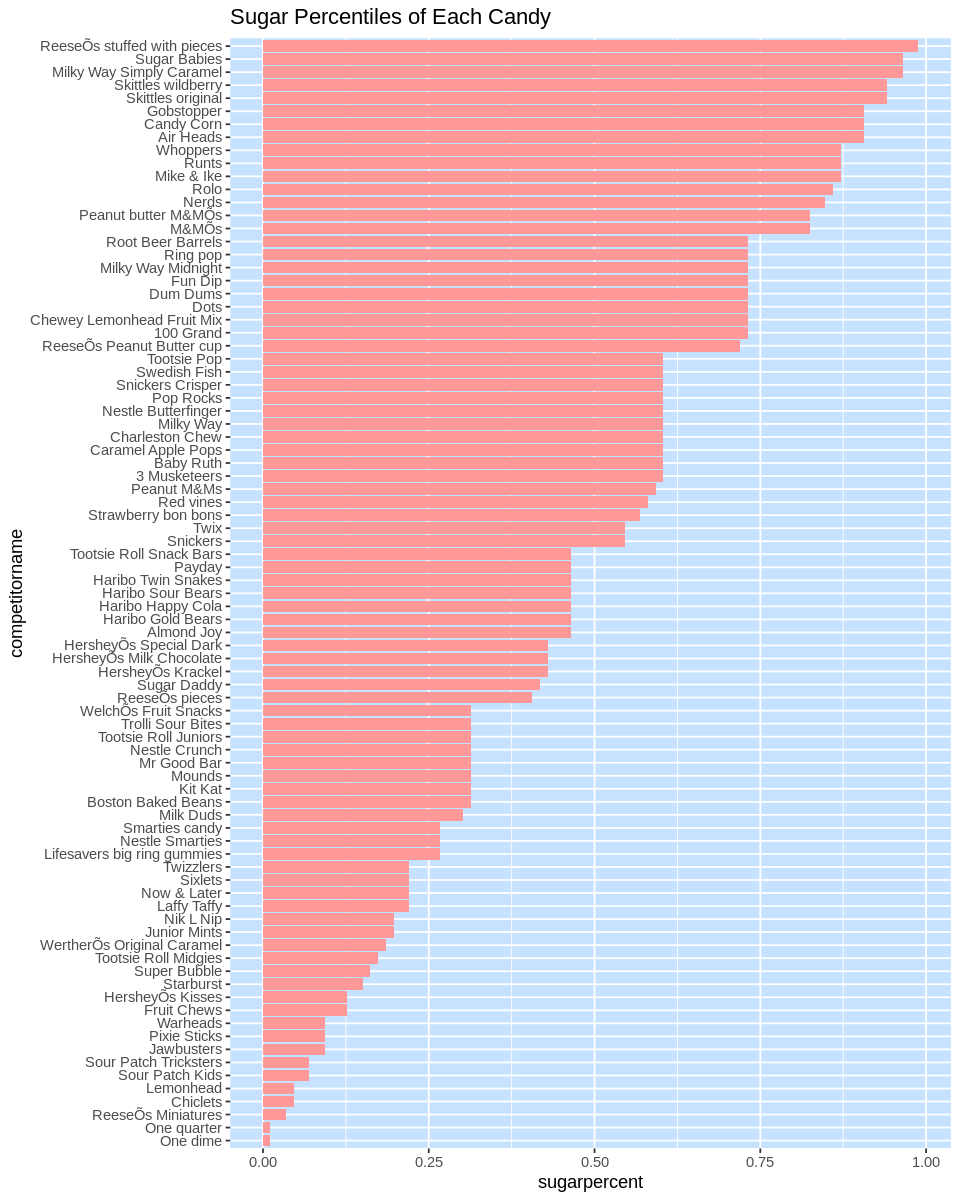

In [42]:
options(repr.plot.width = 8, repr.plot.height = 10)

candy_rank_sorted = candy_rank %>% mutate(competitorname = fct_reorder(competitorname, sugarpercent))

p = ggplot(candy_rank_sorted, aes(x = sugarpercent, y = competitorname))

p = p + geom_col(fill = "#FF9999")

p = p + theme(panel.background = element_rect(fill = "slategray1"))

p = p + labs(title = "Sugar Percentiles of Each Candy")

p

### Assessing the Trends

To explore the trends between sugarpercent, pricepercent, and winpercent among all the candy types, I decided a scatterplot would be the most intuitive way to present the data. Further, a trendline was added to clearly show any visible trends. I created a set of 3 plots for my second visualization, which map all the combinations between the three variables of interest. I also tested how the graphs would look with the axes flipped, but the way they are currently presented looked best. I used `geom_point` and `geom_smooth` to make scatterplots with trendlines, and added `method = "lm"` to present the trendline as a linear regression. The color scheme is similar to the first plot, however, the data points were made darker to improve contrast against the background and trendline. As shown below, we can see that as sugar content increases, the relative price point also increases. Likewise, as the relative popularity of the candy increases, the relative price and sugar content increase, respectively. These trends are also apparent when the trendline is not presented as a linear regression, however, adding the regression enhances the clarity of the relationships. 

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



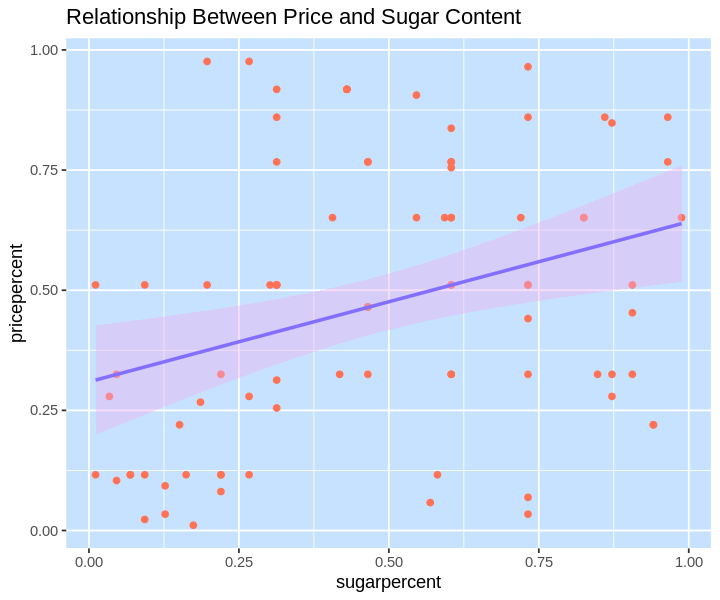

`geom_smooth()` using formula 'y ~ x'



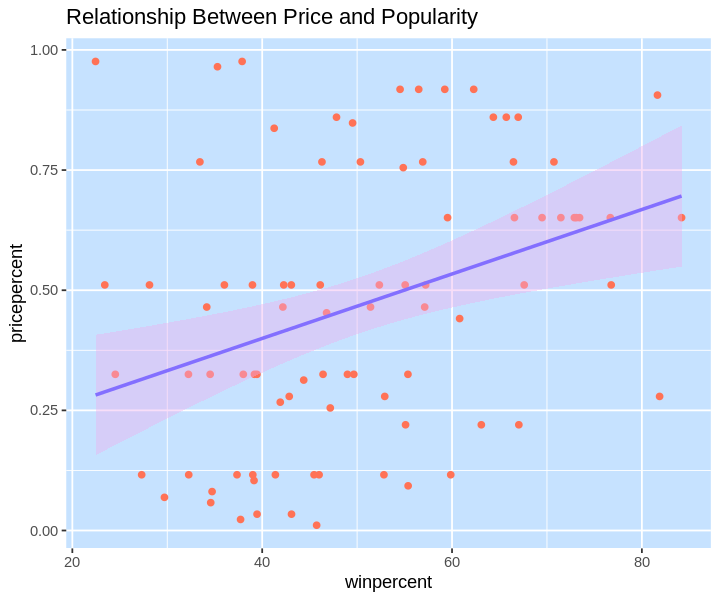

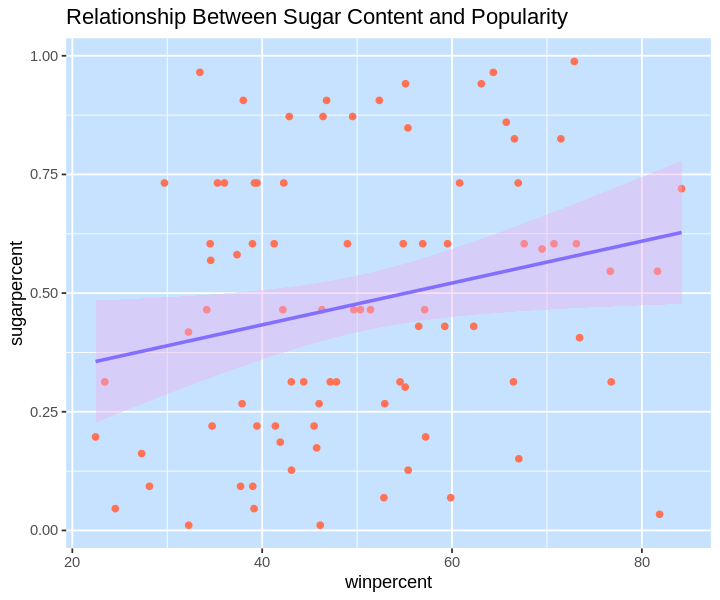

In [14]:
options(repr.plot.width = 6, repr.plot.height = 5)

p = ggplot(candy_rank, aes(x = sugarpercent, y = pricepercent))

p = p + geom_point(color = "coral1")

p = p + geom_smooth(method = "lm", color = "slateblue1", fill = "plum2")

p = p + theme(panel.background = element_rect(fill = "slategray1"))

p = p + labs(title = "Relationship Between Price and Sugar Content")

p

p = ggplot(candy_rank, aes(x = winpercent, y = pricepercent))

p = p + geom_point(color = "coral1")

p = p + geom_smooth(method = "lm", color = "slateblue1", fill = "plum2")

p = p + theme(panel.background = element_rect(fill = "slategray1"))

p = p + labs(title = "Relationship Between Price and Popularity")

p

p = ggplot(candy_rank, aes(x = winpercent, y = sugarpercent))

p = p + geom_point(color = "coral1")

p = p + geom_smooth(method = "lm", color = "slateblue1", fill = "plum2")

p = p + theme(panel.background = element_rect(fill = "slategray1"))

p = p + labs(title = "Relationship Between Sugar Content and Popularity")

p

### Trend Breakdown between Fruity and Non-Fruit Candy

After viewing the relationships between my three data columns of interest, I sought to understand these relationships with the inclusion of one of the binary candy characteristics included in data. I chose the `fruity` category out of personal preference among all of the categories listed, though `crispedricewafer` was a close second. I factored trendlines of the scatterplots by the fruity category. This allows us to understand how fruity (1) and non-fruity (0) candy compare within the previously plotted relationships. While the first set of plots all generally display a positive association between variables, the plots below demonstrate more elaborative trends.

In the first plot, both fruity and non-fruity candy show a positive association between relative price and sugar content, and non-fruity candies are shown to be generally more expensive. In the second plot, there is an inverse relationship between fruity and non-fruity candy. Among fruity candy, as the relative popularity increases, the relative cost decreases. The inverse can be said for non-fruit candy. In the third plot. In third plot, the relative popularity of both fruity and non-fruity candy  increase as sugar content increase. Notably, there is a greater difference between the lower sugar/less popular fruity candy compared to non-fruity candy. These three plots demonstrate different trends between fruity and non-fruity candy, which was very interesting to observe. In future plots, it would be interesting to extend this exploration to other the other characteristics of candy provided in the data.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



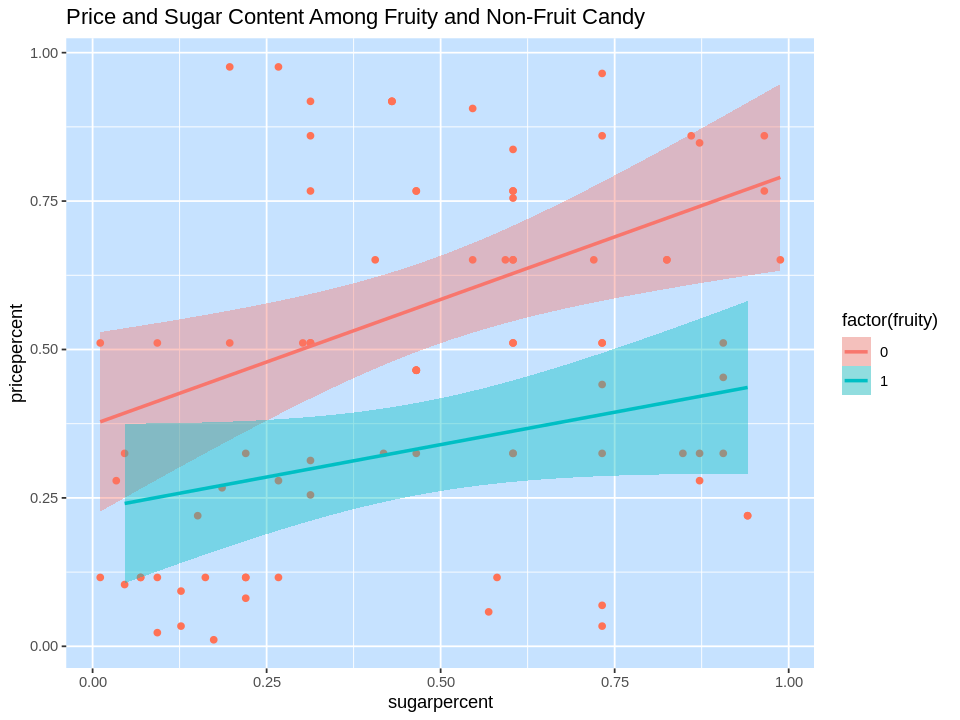

`geom_smooth()` using formula 'y ~ x'



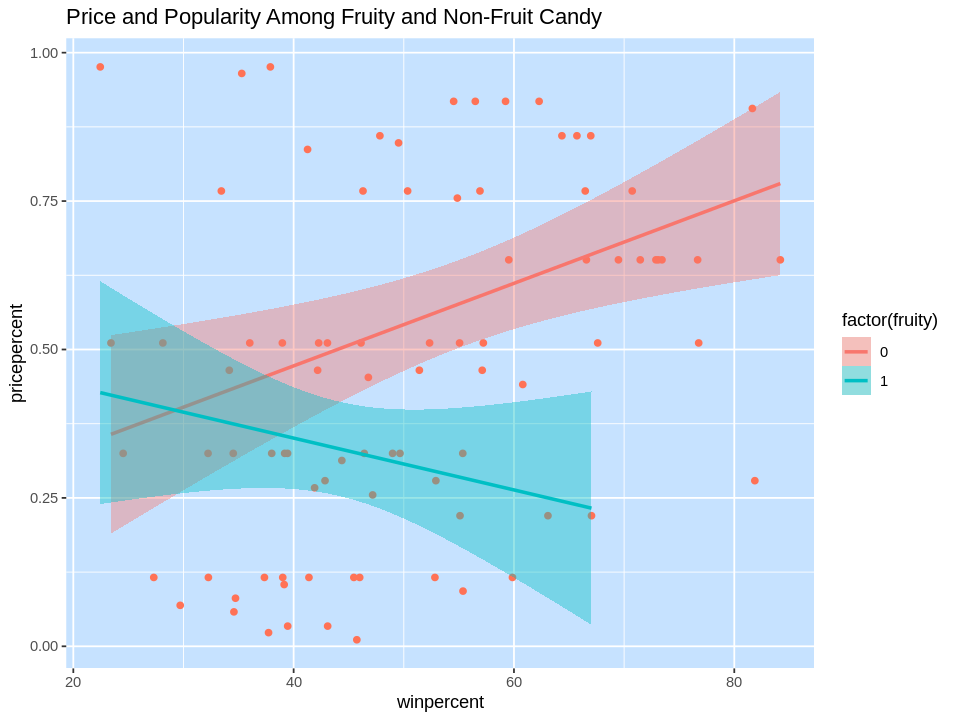

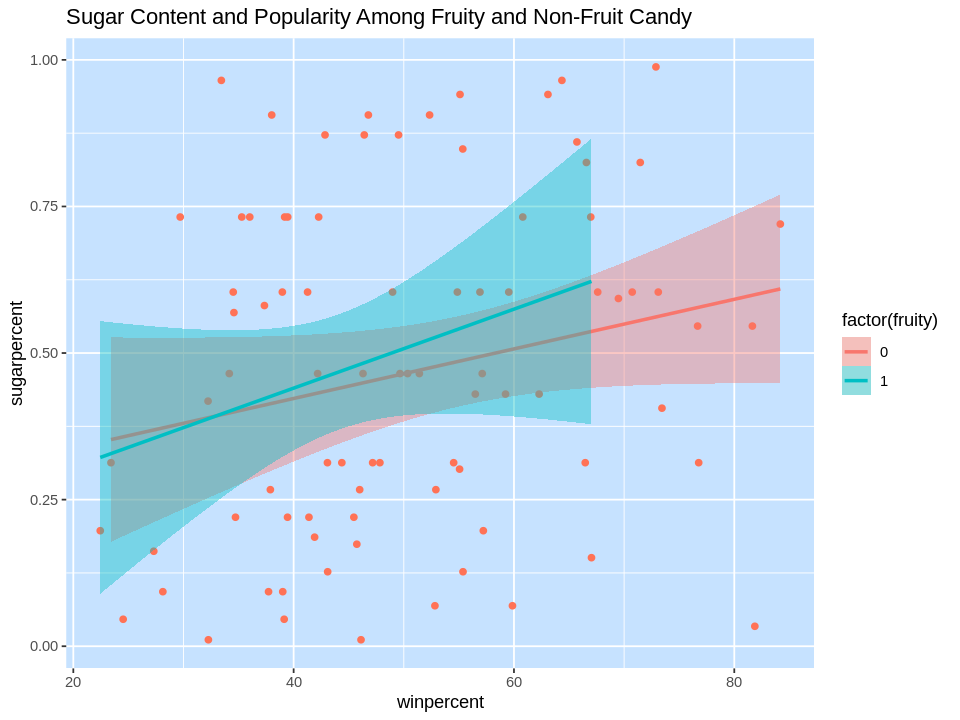

In [22]:
options(repr.plot.width = 8, repr.plot.height = 6)

p = ggplot(candy_rank, aes(x = sugarpercent, y = pricepercent, color = factor(fruity)))

p = p + geom_point(color = "coral1")

p = p + geom_smooth(method = "lm", aes(fill = factor(fruity)))

p = p + theme(panel.background = element_rect(fill = "slategray1"))

p = p + labs(title = "Price and Sugar Content Among Fruity and Non-Fruit Candy")

p 

p = ggplot(candy_rank, aes(x = winpercent, y = pricepercent, color = factor(fruity)))

p = p + geom_point(color = "coral1")

p = p + geom_smooth(method = "lm", aes(fill = factor(fruity)))

p = p + theme(panel.background = element_rect(fill = "slategray1"))

p = p + labs(title = "Price and Popularity Among Fruity and Non-Fruit Candy")

p 

p = ggplot(candy_rank, aes(x = winpercent, y = sugarpercent, color = factor(fruity)))

p = p + geom_point(color = "coral1")

p = p + geom_smooth(method = "lm", aes(fill = factor(fruity)))

p = p + theme(panel.background = element_rect(fill = "slategray1"))

p = p + labs(title = "Sugar Content and Popularity Among Fruity and Non-Fruit Candy")

p